In [1]:
#08/02/23: Still needs to be able to align light images (if rotated, for example)

In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
import astropy
from astropy.io import fits
from astropy.stats import mad_std
import ccdproc as ccdp
#Put your folder name and name of object observed here:
raw_path="TOI-3722"
cal="calibrated"
raw_path= Path(raw_path)
calibrated_path = os.path.join(raw_path,cal)
os.mkdir(calibrated_path)
object_name="TOI-3722"
reduced_images = ccdp.ImageFileCollection(Path(raw_path))

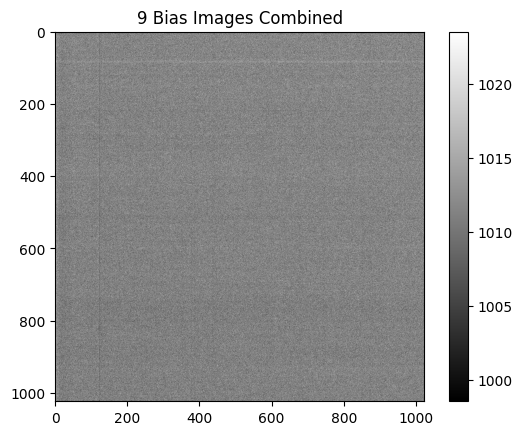

In [2]:
#Change the imagetyp to the imagetyp in your FITS Header if this one is throwing an error by not outputting any images
bias_images = reduced_images.files_filtered(imagetyp='Bias Frame', include_path=True)
#print(calibrated_biases)

combined_bias = ccdp.combine(bias_images,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=800e6, unit = 'electron'
                            )

combined_bias.meta['combined'] = True
outfile_bias = 'combined_bias.fit'
outfile_bias_path = os.path.join(raw_path,outfile_bias)
combined_bias.write(raw_path/'combined_bias.fit',overwrite=True)
plt.imshow(combined_bias.data, cmap='gray')
plt.colorbar()
plt.title('{} Bias Images Combined'.format(len(bias_images)));

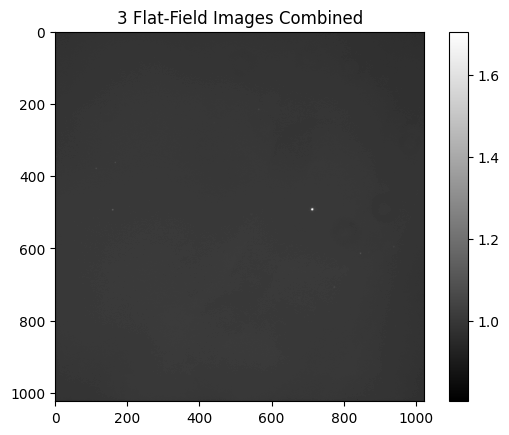

In [3]:
flat_images = reduced_images.files_filtered(imagetyp='Flat Field', include_path=True)
#print(combined_flat)
def inv_median(a):
    return 1 / np.median(a)
combined_flat = ccdp.combine(flat_images,
                                 method='median', scale=inv_median,
                                 sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                                 sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                                 mem_limit=350e6,unit="electron"
                                )
combined_flat.meta['combined'] = True
plt.imshow(combined_flat, cmap='gray')
plt.colorbar()
plt.title('{} Flat-Field Images Combined'.format(len(flat_images)));
outfile_flat = 'combined_flat.fit'
outfile_flat_path = os.path.join(raw_path,outfile_flat)

combined_flat.write(raw_path / 'combined_flat.fit',overwrite=True)

['TOI-3722\\k231009.019.fit', 'TOI-3722\\k231009.020.fit', 'TOI-3722\\k231009.021.fit', 'TOI-3722\\k231009.022.fit', 'TOI-3722\\k231009.023.fit', 'TOI-3722\\k231009.024.fit', 'TOI-3722\\k231009.025.fit', 'TOI-3722\\k231009.026.fit', 'TOI-3722\\k231009.027.fit', 'TOI-3722\\k231009.028.fit', 'TOI-3722\\k231009.029.fit', 'TOI-3722\\k231009.030.fit', 'TOI-3722\\k231009.031.fit', 'TOI-3722\\k231009.032.fit', 'TOI-3722\\k231009.033.fit', 'TOI-3722\\k231009.034.fit', 'TOI-3722\\k231009.035.fit', 'TOI-3722\\k231009.036.fit', 'TOI-3722\\k231009.037.fit', 'TOI-3722\\k231009.038.fit', 'TOI-3722\\k231009.039.fit', 'TOI-3722\\k231009.040.fit', 'TOI-3722\\k231009.041.fit', 'TOI-3722\\k231009.042.fit', 'TOI-3722\\k231009.043.fit', 'TOI-3722\\k231009.044.fit', 'TOI-3722\\k231009.045.fit', 'TOI-3722\\k231009.046.fit', 'TOI-3722\\k231009.047.fit', 'TOI-3722\\k231009.048.fit', 'TOI-3722\\k231009.049.fit', 'TOI-3722\\k231009.050.fit', 'TOI-3722\\k231009.051.fit', 'TOI-3722\\k231009.052.fit', 'TOI-3722\\k2

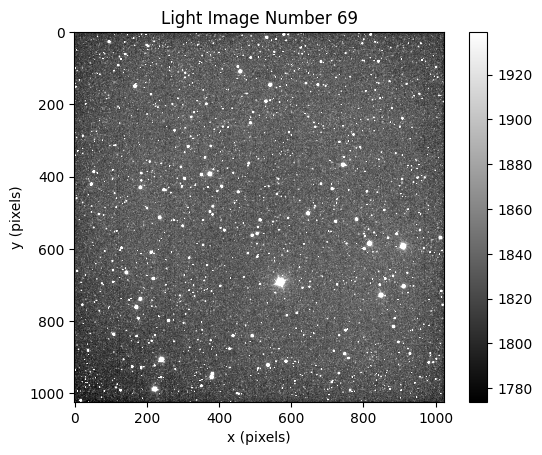

In [4]:
directo=Path(raw_path)
light_images = reduced_images.files_filtered(imagetyp='Light Frame', include_path=True)
print(light_images)
i=1
for image in light_images:
    with fits.open(image) as hdul:
        data = hdul[0].data
        arraylightuncomp=data
        arraylight=arraylightuncomp.flatten()
        vlow=np.sort(arraylight)[round(len(np.sort(arraylight))*0.01)]
        vlowcorr=np.sort(arraylight)[round(len(np.sort(arraylight))*0.02)]
        vhigh=np.sort(arraylight)[round(len(np.sort(arraylight))*0.99)]
        vhighcorr=np.sort(arraylight)[round(len(np.sort(arraylight))*0.98)]
        hlow=np.sort(arraylight)[round(len(np.sort(arraylight))*0.005)]
        hhigh=np.sort(arraylight)[round(len(np.sort(arraylight))*0.995)]
        plt.imshow(arraylightuncomp,cmap='gray',vmin=vlowcorr,vmax=vhighcorr);
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        plt.title("Light Image Number "+str(i));
        i=i+1
plt.colorbar()

INFO:astropy:using the unit electron passed to the FITS reader instead of the unit electron in the FITS file.
INFO:astropy:using the unit electron passed to the FITS reader instead of the unit electron in the FITS file.


INFO: using the unit electron passed to the FITS reader instead of the unit electron in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit electron passed to the FITS reader instead of the unit electron in the FITS file. [astropy.nddata.ccddata]
Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated01.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated02.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated03.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated04.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated05.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated06.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated07.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated08.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated09.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated10.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated11.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated12.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated13.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated14.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated15.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated16.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated17.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated18.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated19.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated20.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated21.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated22.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated23.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated24.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated25.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated26.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated27.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated28.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated29.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated30.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated31.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated32.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated33.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated34.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated35.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated36.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated37.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated38.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated39.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated40.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated41.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated42.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated43.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated44.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated45.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated46.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated47.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated48.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated49.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated50.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated51.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated52.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated53.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated54.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated55.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated56.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated57.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated58.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated59.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated60.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated61.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated62.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated63.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated64.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated65.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated66.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated67.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated68.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


Filename: TOI-3722\calibrated\stacked_TOI-3722_nofilter_calibrated69.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (1024, 1024)   float64   
  1  MASK          1 ImageHDU         8   (1024, 1024)   uint8   
  2  UNCERT        1 ImageHDU         9   (1024, 1024)   float64   


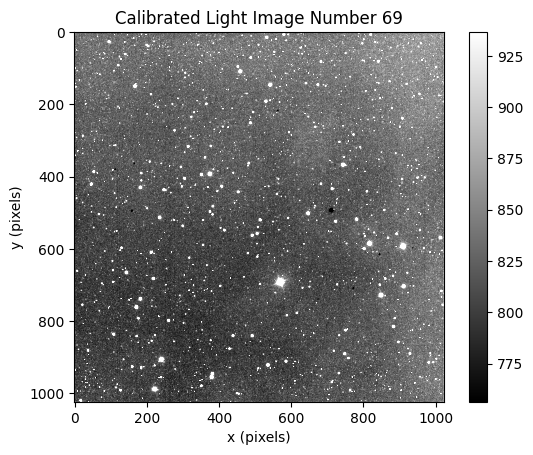

In [5]:
#Input your stacked image name paths here:
master_flat = outfile_flat_path
master_bias = outfile_bias_path

master_flat = astropy.nddata.CCDData.read(master_flat, unit="electron")
master_bias = astropy.nddata.CCDData.read(master_bias, unit="electron")
i=1
for image in light_images:
    light_uncal = astropy.nddata.CCDData.read(image, unit="electron")
    
    final_flatcorrected = ccdp.flat_correct(light_uncal, master_flat)
    final_flatbiascorrected = ccdp.subtract_bias(final_flatcorrected, master_bias)

    vlowcorr=np.sort(final_flatbiascorrected.data.flatten())[round(len(np.sort(arraylight))*0.02)]
    vhighcorr=np.sort(final_flatbiascorrected.data.flatten())[round(len(np.sort(arraylight))*0.98)]
    
    plt.imshow(final_flatbiascorrected,cmap='gray',vmin=vlowcorr,vmax=vhighcorr)
    plt.xlabel('x (pixels)')
    plt.ylabel('y (pixels)')
    plt.title("Calibrated Light Image Number "+str(i));
    if i<10:
        outfile = 'stacked_'+object_name+'_nofilter_calibrated'+'0'+str(i)+'.fit'
    if i>=10:
        outfile = 'stacked_'+object_name+'_nofilter_calibrated'+str(i)+'.fit'
    outfile_path = os.path.join(calibrated_path,outfile)
    
    final_flatbiascorrected.write(outfile_path, overwrite=True)
    fits.info(outfile_path)
    fits.getdata(outfile_path)
    i=i+1
plt.colorbar()
#colorbar.setlabel("Count (ADU)")

In [ ]:
#Credits:
"""https://ccdproc.readthedocs.io/en/latest/api/ccdproc.combine.html"""
"""https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/05-04-Combining-flats.html"""
"""https://ccdproc.readthedocs.io/en/latest/api/ccdproc.ImageFileCollection.html#ccdproc.ImageFileCollection.files_filtered"""
"""https://docs.astropy.org/en/stable/api/astropy.nddata.CCDData.html"""
"""https://ccdproc.readthedocs.io/en/latest/getting_started.html"""
"""https://ccdproc.readthedocs.io/en/latest/api/ccdproc.subtract_bias.html#ccdproc.subtract_bias"""
"""https://ccdproc.readthedocs.io/en/latest/api/ccdproc.flat_correct.html"""